In [41]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Import your dataset and utility functions
import dataset
import utils

# Set the same parameters as your training script
BATCH_SIZE = 12
SPLIT_INDEX = 1
NORMALIZE = False
AUGMENTATION = 4

# Define Transformations
flipHorVer = dataset.RandomFlip()
flipLR = dataset.RandomFlipLeftRight()
rot90 = dataset.RandomRot90()
scale = dataset.RandomScale()
noise = dataset.RandomNoise()

if AUGMENTATION == 0:
    transform = None
elif AUGMENTATION == 1:
    transform = transforms.Compose([flipHorVer])
elif AUGMENTATION == 2:
    transform = transforms.Compose([rot90])
elif AUGMENTATION == 3:
    transform = transforms.Compose([flipLR])
elif AUGMENTATION == 12:
    transform = transforms.Compose([flipHorVer, rot90])
elif AUGMENTATION == 4:
    transform = transforms.Compose([scale])
elif AUGMENTATION == 5:
    transform = transforms.Compose([noise])
elif AUGMENTATION == 14:
    transform = transforms.Compose([flipHorVer, scale])
elif AUGMENTATION == 34:
    transform = transforms.Compose([flipLR, scale])
elif AUGMENTATION == 45:
    transform = transforms.Compose([scale, noise])

# Load dataset
train_dset, trainval_dset, val_dset, _, balance_weight_neg_pos = dataset.get_datasets_singleview(
    transform, NORMALIZE, False, SPLIT_INDEX)

train_loader = torch.utils.data.DataLoader(train_dset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)

# Print dataset info
print(f"Training set size: {len(train_dset.df)}")
print(f"Validation set size: {len(val_dset.df)}")
print(f"Class balance: No Tumor={balance_weight_neg_pos[0]}, Tumor={balance_weight_neg_pos[1]}")


Training set size: 22
Validation set size: 6
Class balance: No Tumor=0.4285714285714286, Tumor=0.5714285714285714


Image batch shape: torch.Size([12, 1, 310, 310])


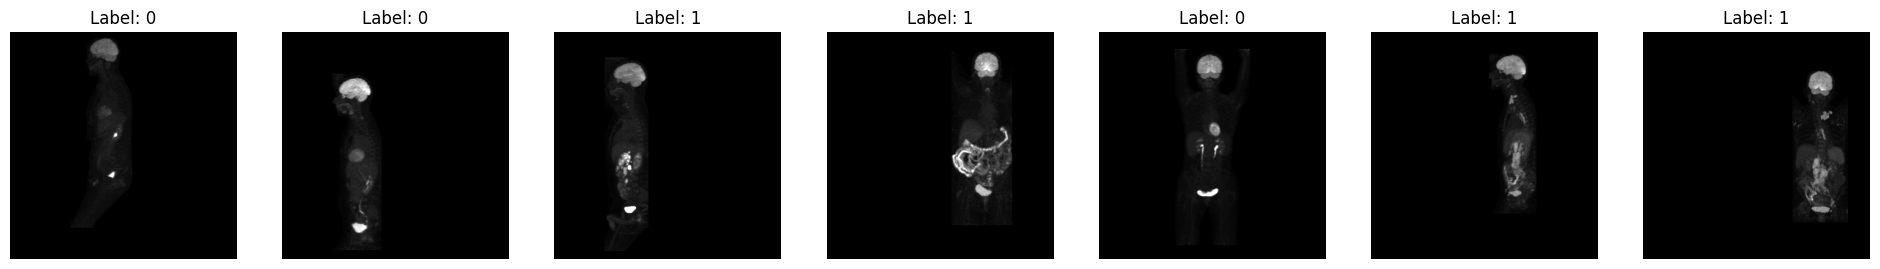

In [38]:
def visualize_batch(loader):
    """Visualizes one batch of images from the DataLoader."""
    # Get one batch
    dataiter = iter(loader)
    images, labels = next(dataiter)

    # Print image shape
    print(f"Image batch shape: {images.shape}")  # Expected: (batch_size, channels, height, width)

    # Convert tensor to NumPy format (assuming images are in CxHxW format)
    images = images.numpy().transpose((0, 2, 3, 1))  # Change to (batch_size, height, width, channels)

    # Normalize images for display if they are grayscale (1-channel)
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)  # Remove channel dimension for grayscale

    # Plot images
    fig, axes = plt.subplots(1, min(len(images), 7), figsize=(24, 12))
    if min(len(images), 7) == 1:
        axes = [axes]  # Make it iterable if there's only one image

    for i in range(min(len(images), 7)):  # Show up to 4 images
        axes[i].imshow(images[i], cmap="gray" if images.ndim == 3 else None)
        axes[i].axis("off")
        axes[i].set_title(f"Label: {labels[i].item()}")

    plt.show()

# Call the function to visualize images
visualize_batch(train_loader)
